# PILLOW Library

Here is a plain notebook (NB) some functions from the PILLOW library to analyze images. 
It's a never ending NB since i will probably add some new functions as soon as i will found one. 

I also go back and forth between the PIL and Numpy formats.


In [40]:
import os,sys
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

## Open the image and get the basic informations

Size of the image : (900, 603)


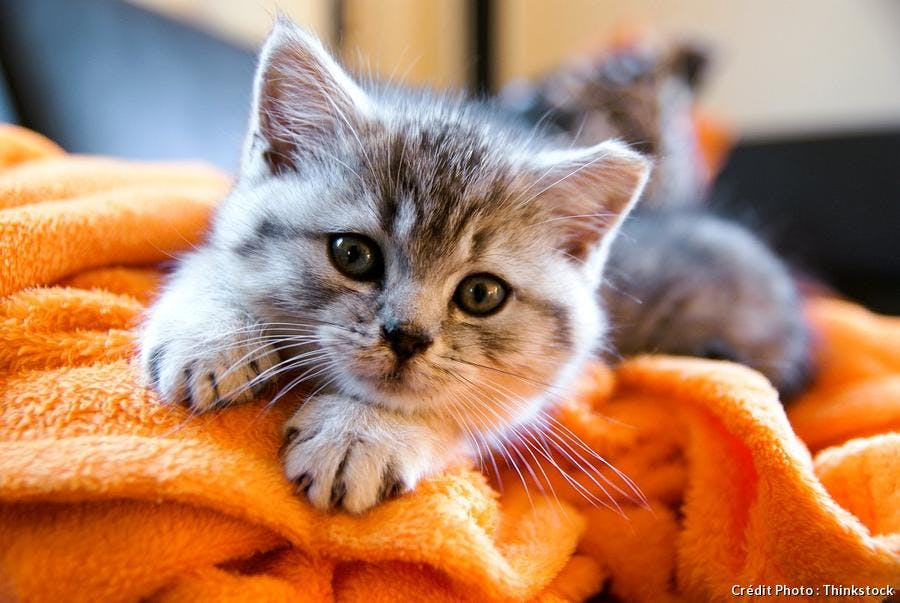

In [41]:
im_original = Image.open("./images/photo_chat.jpg")
print(f"Size of the image : {im_original.size}")

#im_original.show(title="What a nice cat")
display(im_original)

shape is (column (width), row (height)).

In [42]:
# If you try to get the type of the image it will raise an error
#print(f"Type of the image : {im.dtype}")

# Now convert the image into a Numpy array
img = np.array(im_original)
print(f"type of the image : {img.dtype}")
print(f"shape of the image : {img.shape}")

type of the image : uint8
shape of the image : (603, 900, 3)


The ndarray 3D whose shape is (row (height), column (width), color (channel)).
One can see that this image has 3 channels for the 3 RGB colors.
Let's play with the histograms

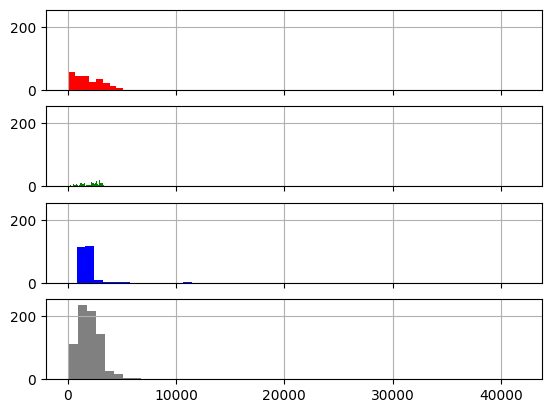

In [43]:
r, g, b = im_original.split()
len(r.histogram())

value_r = r.histogram()
value_g = g.histogram()
value_b = b.histogram()

# plot the histograms
fig, axes = plt.subplots(4,1, sharex = True)

axes[0].hist(value_r, bins = 50, color="red")
axes[0].grid(True)
axes[1].hist(value_g, bins = 50, color="green")
axes[1].grid(True)
axes[2].hist(value_b, bins = 50, color="blue")
axes[2].grid(True)
axes[3].hist(im.histogram(), bins = 50, color="grey")
axes[3].grid(True)
for ax in axes:
    ax.grid(True)
    ax.set_ylim([0, 255])

plt.show()

## Split images in channels and plot them

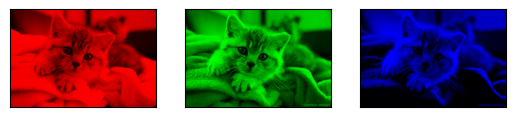

In [44]:
im_R = img.copy()
im_R[:, :, (1, 2)] = 0
im_G = img.copy()
im_G[:, :, (0, 2)] = 0
im_B = img.copy()
im_B[:, :, (0, 1)] = 0
fig, axes = plt.subplots(1,3)
axes[0].imshow(im_R)
axes[1].imshow(im_G)
axes[2].imshow(im_B)

for ax in axes : 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Let's go on with the colors. 
Plot the grey scale version of the image


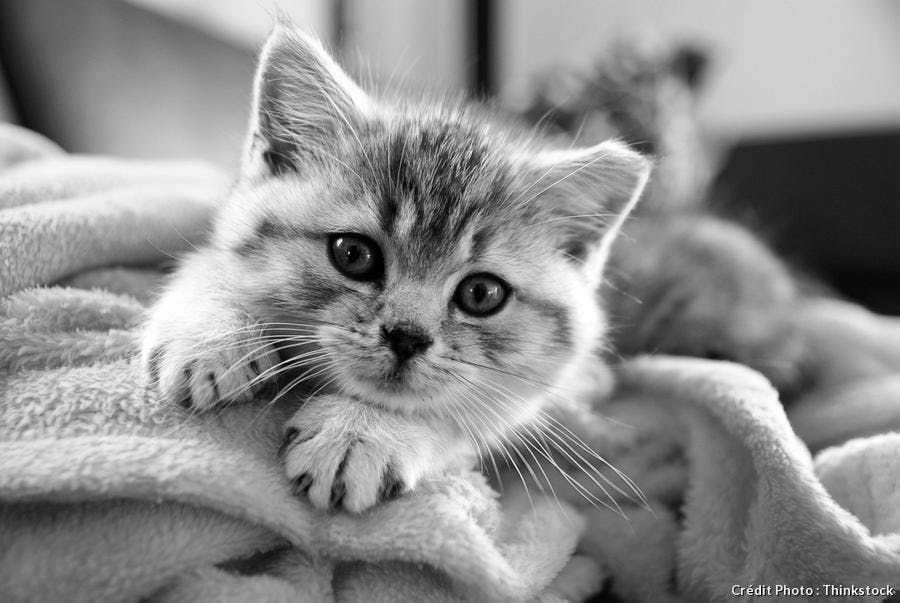

In [45]:
from PIL import ImageOps 

im_GS = ImageOps.grayscale(im_original) 
# im_GS.show()  # To get the image into a window
display(im_GS)  # To get the image inline 

## How to get the negative version of this image ? 

A negative-positive inverted image can be generated by subtracting the pixel value from the maximum value (255 for uint8).

To achieve this, I converted my image to numpy format, subtracted 255 and then converted it back to image format using the Image.fromarray() command.



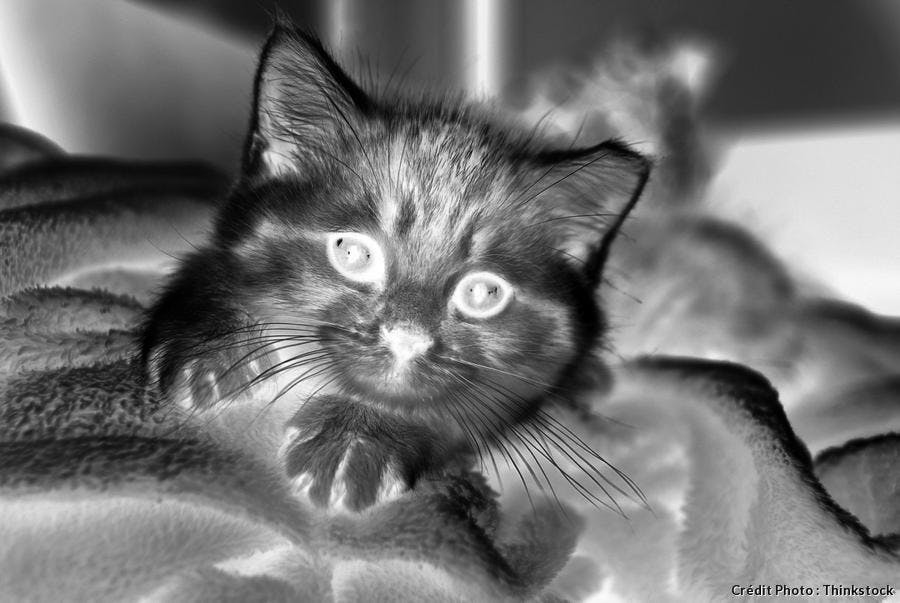

In [62]:
im_GS_neg = 255 - np.array(im_GS)
im_GS_neg = Image.fromarray(im_GS_neg)

display(im_GS_neg)

## Crop an image

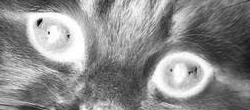

In [63]:
# First corner
left = 300 ; top = 220
# Second corner
right = 550 ; bottom = 330
 
im_crop = im_GS_neg.crop((left, top, right, bottom)) 
display(im_crop)

In [ ]:
# Imagine that i want to split this image in for part

(110, 250)
50


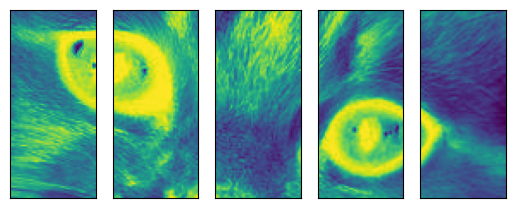

In [78]:
im_crop  = np.array(im_crop)
print(im_crop.shape)

nb_slice = 5
width_slice = int(im_crop.shape[1]/nb_slice)
fig, axes = plt.subplots(1, nb_slice)
print(width_slice)
for i in range(0, nb_slice): 
    axes[i].imshow(im_crop[:,i*width_slice:(i+1)*width_slice])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Test sur les différents downscale d'image

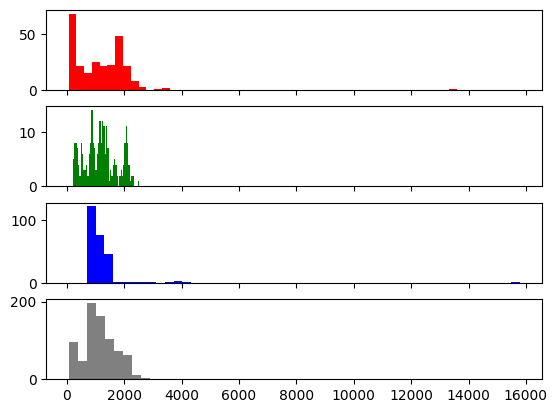

In [48]:
r, g, b = img_res.split()
len(r.histogram())
### 256 ###
 
value_r = r.histogram()
value_g = g.histogram()
value_b = b.histogram()

fig, axes = plt.subplots(4,1, sharex = True)

axes[0].hist(value_r, bins = 50, color="red")
axes[1].hist(value_g, bins = 50, color="green")
axes[2].hist(value_b, bins = 50, color="blue")
axes[3].hist(img_res.histogram(), bins = 50, color="grey")

plt.show()

## Extraire les metadata d'une image

In [49]:
from PIL.ExifTags import TAGS
# extracting the exif metadata
exifdata = im_crop.getexif()
 
# looping through all the tags present in exifdata
for tagid in exifdata:
     
    # getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
 
    # passing the tagid to get its respective value
    value = exifdata.get(tagid)
   
    # printing the final result
    print(f"{tagname:25}: {value}")

ExifOffset               : 26
